In [41]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Online_Retail_Data_Set.csv",encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
print(len(df['InvoiceNo'].unique()))

25900


In [45]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## There are duplicates in the dataset. I am removing it here.

In [46]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

5268
0


## There are null values here. I am imputing the description column with 'Unknown' and dropping other nan values rows.

In [47]:
print(df.isna().sum())
df['Description'] = df['Description'].fillna("Unknown")
df = df.dropna()
print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Here I am converting the 'InvoiceDate' column to datetime . However in my notebook it shows error if I use (format='mixed'). So I have not used this. But in other devices or platforms it is advised to use format='mixed'. I have commented it.

In [48]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='mixed')
# df['Quantity'] = pd.to_numeric(df['Quantity'])
# df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


<Axes: ylabel='UnitPrice'>

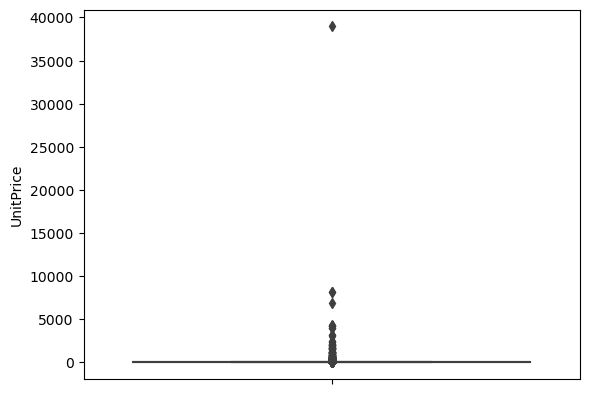

In [49]:
sns.boxplot(y = 'UnitPrice', data=df)

In [40]:
print(df[df['UnitPrice'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Time, Month, Day, Year, Total, Hour]
Index: []


## Seeing whether there are negative values for UnitPrice

<Axes: ylabel='UnitPrice'>

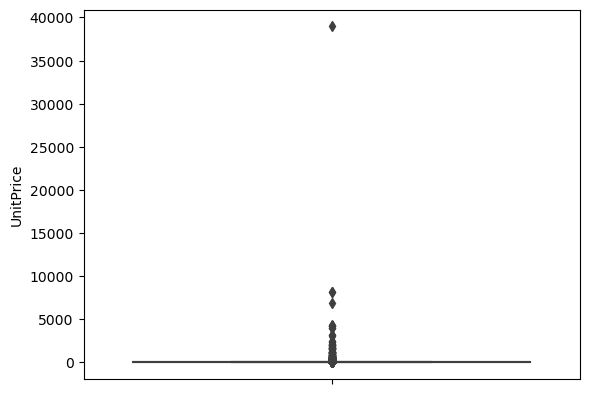

In [10]:
sns.boxplot(y = 'UnitPrice', data=df)

## Seeing whether there are negative values for quantity and then removing them

<Axes: ylabel='Quantity'>

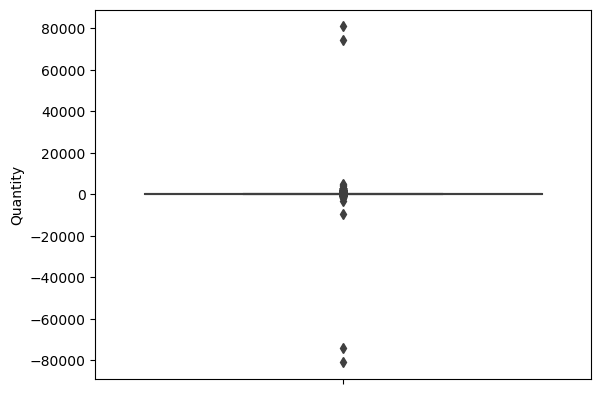

In [11]:
sns.boxplot(y = 'Quantity', data=df)

In [12]:
df=df[df['Quantity'] > 0]

## As we can see no negative values after removal

<Axes: ylabel='Quantity'>

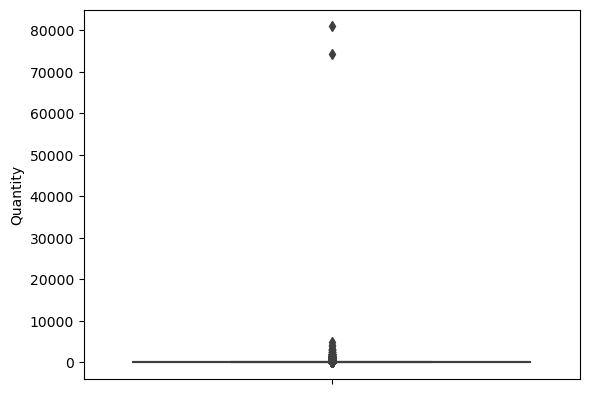

In [13]:
sns.boxplot(y = 'Quantity', data=df)

## Coverting the date to time,month,day and year

In [14]:
df['Time'] = df['InvoiceDate'].dt.time
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Year']= df['InvoiceDate'].dt.year


## Seeing whether there is any string in Description column with 'Adjust bad debt' and removing it 

In [15]:
df[df['Description'].str.contains('Adjust bad debt',case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year


In [16]:
df=df[~df['Description'].str.contains('Adjust bad debt',case=False)]
print(df[df['Description'].str.contains('Adjust bad debt',case=False)])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Time, Month, Day, Year]
Index: []


## Removing outliers

In [17]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    idx = df[(df[col] >= upper) | (df[col] <= lower)].index
    df.drop(idx , inplace=True)

In [18]:
remove_outlier(df, 'Quantity')
remove_outlier(df, 'UnitPrice')

## Creating a column named 'Total' by multiplying 'Quantity' and 'UnitPrice' column

In [19]:
df['Total'] = df['Quantity']*df['UnitPrice']

In [20]:
#[['Total']] means that it will sum up on Total field and display as Month | Total
sales_2010 = df[df['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
sales_2011 = df[df['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_12828\422354850.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_2010 = df[df['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\422354850.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_2011 = df[df['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()


## A barchart for year 2010 showing sales in different months. December sales was most.

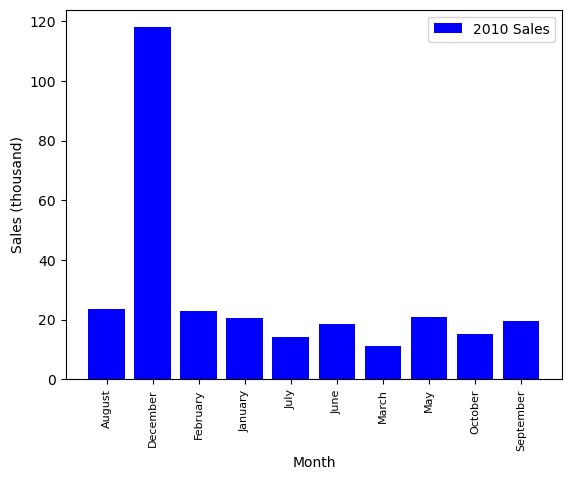

In [21]:
plt.bar(sales_2010["Month"],sales_2010['Total']/1000, label='2010 Sales', color='blue')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()

## A barchart for year 2011 showing sales in different months. November sales was most.

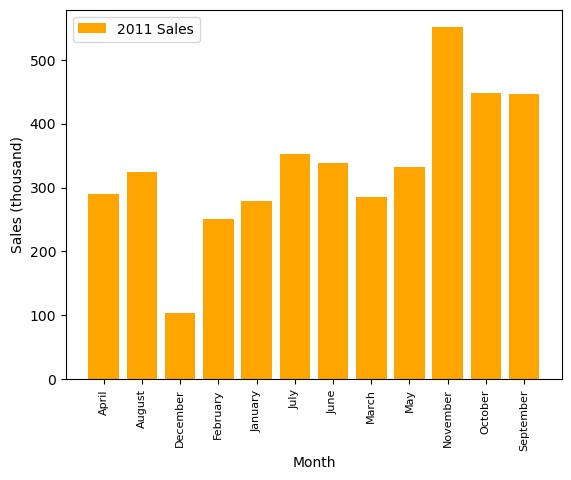

In [22]:
plt.bar(sales_2011["Month"],sales_2011['Total']/1000, label='2011 Sales', color='orange')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()

## A line plot showing sales in different hours of the day

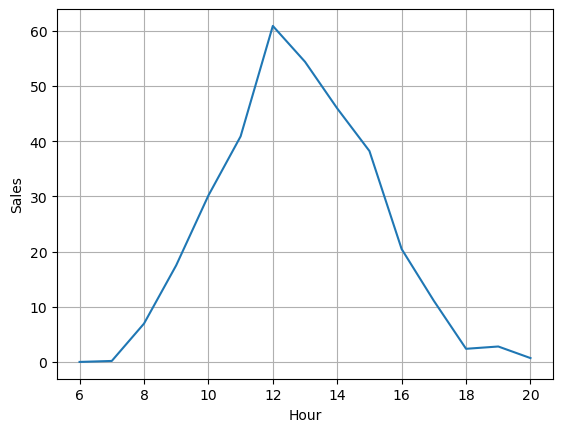

In [23]:
df['Hour']=df['InvoiceDate'].dt.hour
result = df[['Hour','Total']].groupby('Hour').count().reset_index()
from matplotlib.ticker import StrMethodFormatter
plt.plot(result['Hour'],result['Total']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.show()

## A bar plot showing sales in different days of the week

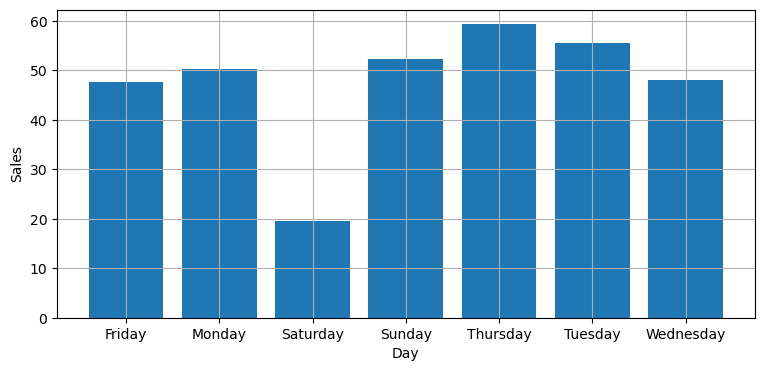

In [24]:
#df['day']=df['InvoiceDate'].dt.hour
plt.figure(figsize =(9, 4)) 
result = df[['Day','Total']].groupby('Day').count().reset_index()
plt.bar(result['Day'],result['Total']/1000)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid()
plt.show()

## Analysis and a bar chart showing top 5 of most sold products in quantity

In [25]:
dfsold = df.groupby('Description').sum()['Quantity'].reset_index()
dfsold =dfsold.sort_values('Quantity',ascending = False ).head(5) 
#just got results for top 10
dfsold.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_12828\3240324327.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsold = df.groupby('Description').sum()['Quantity'].reset_index()


,Description,Quantity
2083,PACK OF 72 RETROSPOT CAKE CASES,14986
193,ASSORTED COLOUR BIRD ORNAMENT,13520
1618,JUMBO BAG RED RETROSPOT,12167
3394,WHITE HANGING HEART T-LIGHT HOLDER,10784
1782,LUNCH BAG RED RETROSPOT,9776


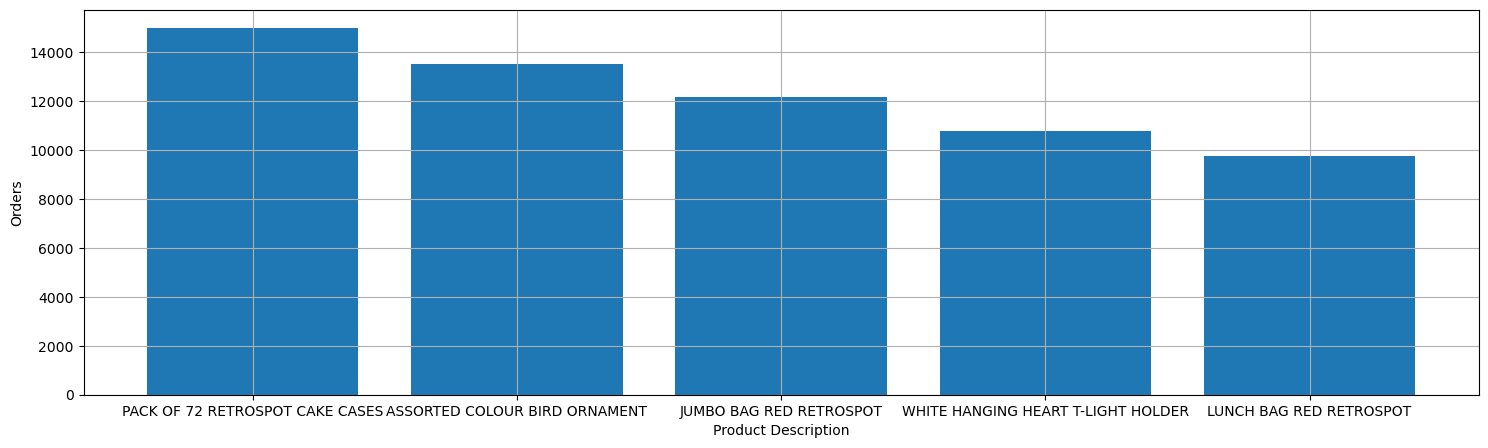

In [26]:
plt.figure(figsize =(18,5)) 
#result = df[['Description','Quantity']].groupby('Day').count().reset_index()
plt.bar(dfsold['Description'],dfsold['Quantity'])
plt.xlabel('Product Description')
plt.ylabel('Orders')
plt.grid()
plt.show()

## A bar chart showing the most customers for a particular country

In [27]:
dfCountry = df['Country'].value_counts().reset_index(drop = False).head(10)
dfCountry.columns = ['Country','Counts'] 

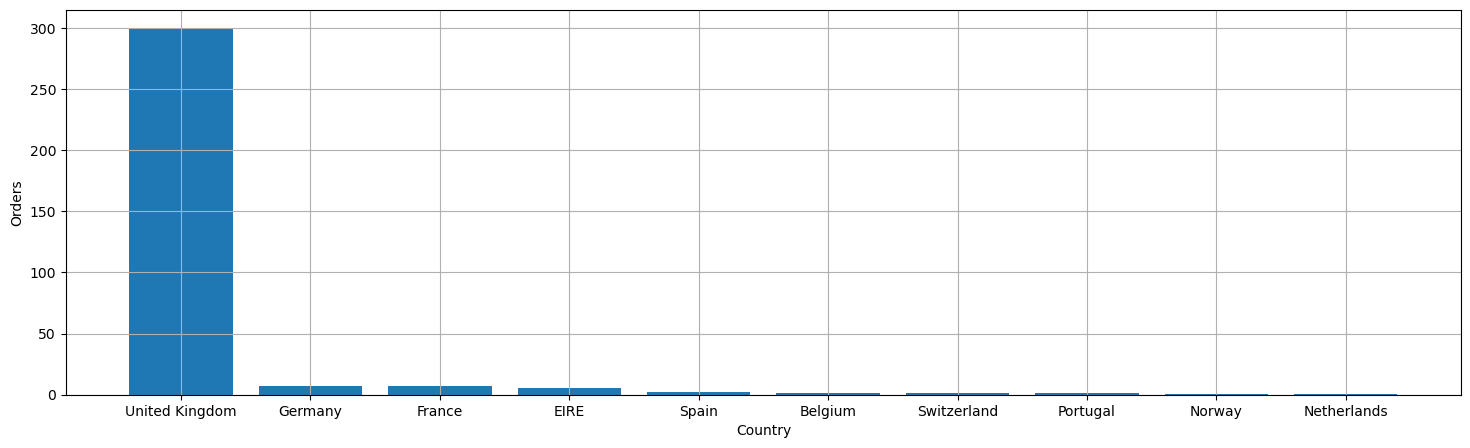

In [28]:
plt.figure(figsize =(18, 5)) 
#result = df[['Description','Quantity']].groupby('Day').count().reset_index()
plt.bar(dfCountry['Country'],dfCountry['Counts']/1000)
plt.xlabel('Country')
plt.ylabel('Orders')
plt.grid()
plt.show()

## An analysis of most bought pair of products in a single sale

In [29]:
from itertools import combinations
from collections import Counter
dfTogether = df.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()
dfTogether.head()

count = Counter()
for row in dfTogether['Description']:
    row_list = row.split(",")
    #item mostly solved together , here it shows 2 items sold together,we can change it to 3
    #to show 3 items sold together and so on ...
    count.update(Counter(combinations(row_list,2)))
#most_common is method from collections
for key,value in count.most_common(10):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 559
(' KEY FOB ', ' BACK DOOR  ') 402
(' KEY FOB ', ' SHED ') 368
(' KEY FOB ', ' FRONT  DOOR  ') 312
(' LUNCH BAG RED RETROSPOT ', ' LUNCH BAG PINK POLKADOT ') 263
(' LUNCH BAG RED RETROSPOT ', ' LUNCH BAG  BLACK SKULL. ') 248
(' ALARM CLOCK BAKELIKE RED  ', ' ALARM CLOCK BAKELIKE GREEN ') 232
(' FANCY FONT BIRTHDAY CARD', '  ') 232
(' LUNCH BAG CARS BLUE ', ' LUNCH BAG PINK POLKADOT ') 229
('COFFEE', 'SUGAR ') 225


# An analysis showing most customers bought a product and visited again to buy it

In [30]:
invcount = df[['CustomerID', 'InvoiceNo']].groupby(by=["CustomerID"]).count().reset_index()
recurring_cust = len(invcount[invcount['InvoiceNo'] > 1])
print('Recurring customers: '+str(recurring_cust))
print('Total customers: '+str(len(invcount)))
print('Percentage of recurring customers: '+str((recurring_cust/len(invcount))*100))

Recurring customers: 4129
Total customers: 4190
Percentage of recurring customers: 98.54415274463008


## Implementation of KMeans

In [31]:
class KMeans:
     def __init__(self, dataval,n_centers=3, init="random", distance_metric="l2", threshold=1e-4,):
        self.n_centers = n_centers
        self.threshold = threshold
        self.data = dataval # array with shape (100 samples, 2 features)
        self.centers = None # array with shape (n_centers, 2)
        self.prev_centers = None # array with shape (n_centers, 2)
        self.data_cluster = None # array with shape (100, )
        self.distances = None # array with shape (n_centers, 100)
        self.distance_metric = distance_metric
        self.init = init
        self.n_dim = None
        # self.max_iter = 1
    
     def fit(self, data):
        """ Initialize data for training
        Parameters:
        data: input features of shape (100, 2)
        """
        self.data = data
        self.n_dim = self.data.shape[-1]
        if self.init == "kmeans++":
            self.centers = self._generate_kmeans_plus_centers()
        elif self.init == "uniform":
            self.centers = self._generate_uniform_centers()
        else:
            self.centers = self._generate_random_sampled_centers()
    
     def _generate_kmeans_plus_centers(self):
        """KMeans++ initialization"""
        centers = []
        X = self.data
        Xarr=np.array(X)
        ## Sample the first point at random
        initial_index = np.random.choice(range(Xarr.shape[0]),)
        centers.append(np.asarray(X.iloc[initial_index, :].tolist()))
        ## Loop and select the remaining points
        for i in range(self.n_centers - 1):
            siz = len(centers)
            distance=[]
            for j in range(siz):
                foo = np.array(((centers[j]) - Xarr)**2)
                distance.append(foo)
            vals=np.sum(distance,axis=2)
            if i == 0:
                pdf = vals / np.sum(vals)
                centroid_new = Xarr[np.random.choice(range(Xarr.shape[0]), replace=False, p=pdf.flatten())]
            else:
                ## Calculate distance of each point from its nearest centroid
                dist_min = np.min(vals, axis=0)
                pdf = dist_min / np.sum(dist_min)
                ## Sample one point from the given prob distribution
                centroid_new = Xarr[np.random.choice(range(Xarr.shape[0]), replace=False, p=pdf.flatten())]
            centers.append(centroid_new.tolist())
        return np.array(centers)

     def _generate_uniform_centers(self):
        """Generate uniform centers"""
        centers = None
        return centers

     def _generate_random_sampled_centers(self):
        """Generate random sampled centers"""
        rand_index = None
        centers = self.data[rand_index]
        return centers

     def _l2(self, point1, point2):
        """Euclidean distance"""
        sum_sq = np.sum(np.square(point1 - point2))
        return np.sqrt(sum_sq)

     def _l1(self, point1, point2):
        """Absolute distance"""
        value=np.abs(point1-point2)
        return value

     def _calculate_distance(self):
        """Wrapper for calculating distance with data and center"""
        dist = []
        final_dist = []
        dt = np.array(self.data)
        for center in self.centers:
            if self.distance_metric == "l1":
                arrval = dt-center
                var=np.sqrt(np.sum(np.square(arrval),axis=1))
            else:
                arrval = dt-center
                var=np.sqrt(np.sum(np.square(arrval),axis=1))
            final_dist.append(var)
        self.distances = np.array(final_dist)
        return self.distances

     def _assign_clusters(self):
        """Assign each data sample to small distanced centroid"""
        self.data_cluster = np.argmin(
        self.distances, axis=0)
        # finding minimum over the the centers
        return self.data_cluster

     def _update_centers(self):  
        """Update centers with new mean among the cluster"""
        self.prev_centers = np.copy(self.centers)
        for i in range(self.n_centers):
            self.centers[i] = np.mean(
            self.data[self.data_cluster == i], axis=0
            ) # mean among the row: axis=0
        return self.centers

     def converge(self):
        """ Training convergence"""
        self._calculate_distance()
        self._assign_clusters()
        self._update_centers()
        
     def is_optimal(self):
        """ Check if the centers are optimal."""
        non_optimal = np.abs(np.sum((self.prev_centers - self.centers),axis=1)) > self.threshold
        if non_optimal.astype(int).sum() == 0:
            return True
        return False


## Using standardization as we are going to run KMeans on the dataset

In [32]:
from sklearn.preprocessing import StandardScaler
dfKmeans=df.copy()
#dfCustomer = dfKmeans.groupby('CustomerID').agg({"Quantity": np.mean, "UnitPrice": np.mean, "Total": np.sum})
dfCustomer = dfKmeans.groupby('CustomerID').agg({"Quantity": np.mean, "UnitPrice": np.mean})
columns=dfCustomer.columns
for column in columns:
    dfCustomer[column]=(dfCustomer[column].max()-dfCustomer[column])/(dfCustomer[column].max()-dfCustomer[column].min())
dfCustomer.head()

,Quantity,UnitPrice
CustomerID,,
12347.0,0.566516,0.693195
12348.0,0.069444,0.940355
12349.0,0.660819,0.668035
12350.0,0.531250,0.804881
12352.0,0.726010,0.580281


## Running KMeans on the dataset

In [33]:
n_clusters = 3
## Noisy KMeans
kmeans_random = KMeans(dfCustomer,n_centers=n_clusters, init="kmeans++", distance_metric="l2")
kmeans_random.fit(dfCustomer)
print(kmeans_random.centers)
kmeans_random.converge()
while not kmeans_random.is_optimal():
    kmeans_random.converge()
print(kmeans_random.centers)

[[0.54166667 0.7694695 ]
 [0.04166667 0.97381437]
 [0.90860215 0.6255643 ]]
[[0.61818614 0.67655698]
 [0.38369027 0.77469204]
 [0.87527025 0.68662952]]


In [34]:
# my_dict={}
# dfKmeanscluster=kmeans_random._assign_clusters()
# for i in range(siz):
#     if len(mydict)==3 :
#         break
#     val1=kmean[i]
#     val2=targetdict[i]
#     print(type(targetdict[i]))
#     if val2 not in mydict:
#         mydict[val2]=val1

## Mapping clusters labels to a dictionary to have consistency as cluster labels may change with each run

In [35]:
mydict={}
dfKmeanscluster=kmeans_random._assign_clusters()
print(dfKmeanscluster)
print(type(dfKmeanscluster))
abhi=np.unique(dfKmeanscluster)
lis=list(dfKmeanscluster)
hell=[]
for i in range(n_clusters):
    hell.append((lis.count(i),i))
hell.sort()
print(hell)
for index,obj in enumerate(hell):
    mydict[index]=obj[1]
print(mydict)

[0 1 0 ... 2 2 1]
<class 'numpy.ndarray'>
[(794, 1), (1321, 2), (2075, 0)]
{0: 1, 1: 2, 2: 0}


## Visualization of cluster centers after using KMenas

[0 1 2]
794
1321
2075


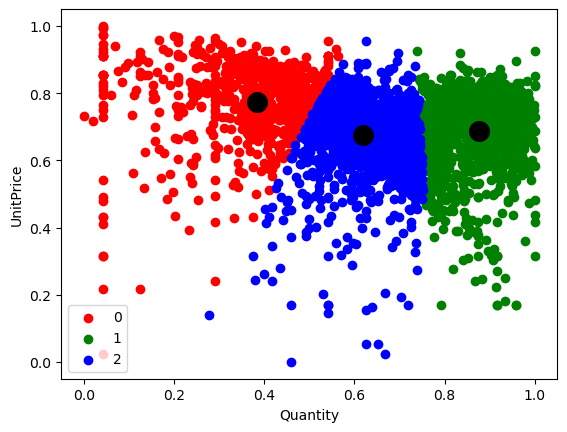

{0: 794, 1: 1321, 2: 2075}


In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# X_pca = pca.fit_transform(dfCustomer)
# Center_pca=pca.transform(kmeans_random.centers)
X_pca = dfCustomer
Center_pca=kmeans_random.centers
cluster_list=np.unique(dfKmeanscluster)
dict1={}
print(cluster_list)
col_list=['red','green','blue']
for i in cluster_list: 
    X_cluster1=X_pca[dfKmeanscluster==mydict[i]]
    dict1[i]=len(X_cluster1)
    print(len(X_cluster1))
    plt.scatter(X_cluster1.iloc[:,0],X_cluster1.iloc[:,1],c=col_list[i])
plt.scatter(Center_pca[:,0],Center_pca[:,1],s=200,c='black')
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.legend(cluster_list)
plt.show()
print(dict1)

## Getting a distribution of spenders by using KMenas. We can see that Moderate Spenders had the most numbers.

In [37]:
abhi=np.unique(dfKmeanscluster)
lis=list(dfKmeanscluster)
dictfinal={}
ab=[]
for i in abhi:
    dictfinal[i]=lis.count(i)
    ab.append(lis.count(mydict[i]))
print(dictfinal)
print(ab)

{0: 2075, 1: 794, 2: 1321}
[794, 1321, 2075]


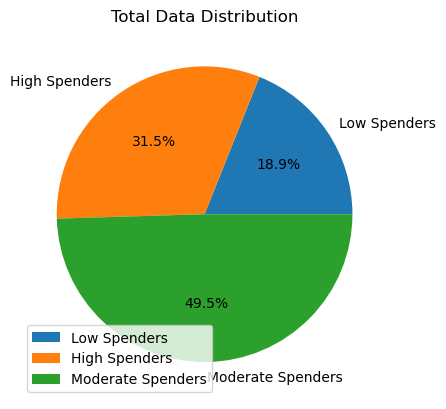

In [38]:

# Creating dataset
cars = ['Low Spenders','High Spenders','Moderate Spenders']
 
data = ab
 
# Creating plot
plt.pie(data, labels=cars,autopct='%1.1f%%')
plt.legend()
# show plot
plt.title('Total Data Distribution')
plt.show()

## Customers with most sales in the dataset

In [39]:
dfcopy=df.copy()
top_buyers = dfcopy[['CustomerID', 'InvoiceNo', 'Total']].groupby(by=["CustomerID"]).sum().reset_index().sort_values(by='Total', ascending=False).head(10)
df[['CustomerID', 'Country']].loc[df['CustomerID'].isin(top_buyers['CustomerID'])].drop_duplicates()

C:\Users\hp\AppData\Local\Temp\ipykernel_12828\161304298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_buyers = dfcopy[['CustomerID', 'InvoiceNo', 'Total']].groupby(by=["CustomerID"]).sum().reset_index().sort_values(by='Total', ascending=False).head(10)


,CustomerID,Country
106,15311.0,United Kingdom
1016,12748.0,United Kingdom
1405,14911.0,EIRE
2037,17841.0,United Kingdom
7322,13081.0,United Kingdom
12691,13089.0,United Kingdom
29816,14298.0,United Kingdom
58118,14156.0,EIRE
66269,14088.0,United Kingdom
317502,14096.0,United Kingdom
